In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants

Welcome to JupyROOT 6.24/04


In [2]:
df = ROOT.RDataFrame('pipkmks__B4_M16', '/lustre19/expphy/volatile/halld/home/viducic/selector_output/f1_pipkmks_flat_bx2/pipkmks_flat_bestX2/pipkmks_flat_bestX2_051763.root')
df = df.Define('kin_chi2ndf', 'kin_chisq/kin_ndf')

In [3]:
cl_min = df.Min('kinfit_cl').GetValue()
cl_max = df.Max('kinfit_cl').GetValue()
cl_mean = df.Mean('kinfit_cl').GetValue()

print(f'CL min: {cl_min} || CL max: {cl_max} || CL mean: {cl_mean}')

CL min: 1.614356366995848e-37 || CL max: 0.9989213943481445 || CL mean: 0.022565962368609322


In [4]:
hist_cl = df.Histo1D(('cl', 'Kinematic Fit Confidence Level', 100, 0, 0.01), 'kinfit_cl')

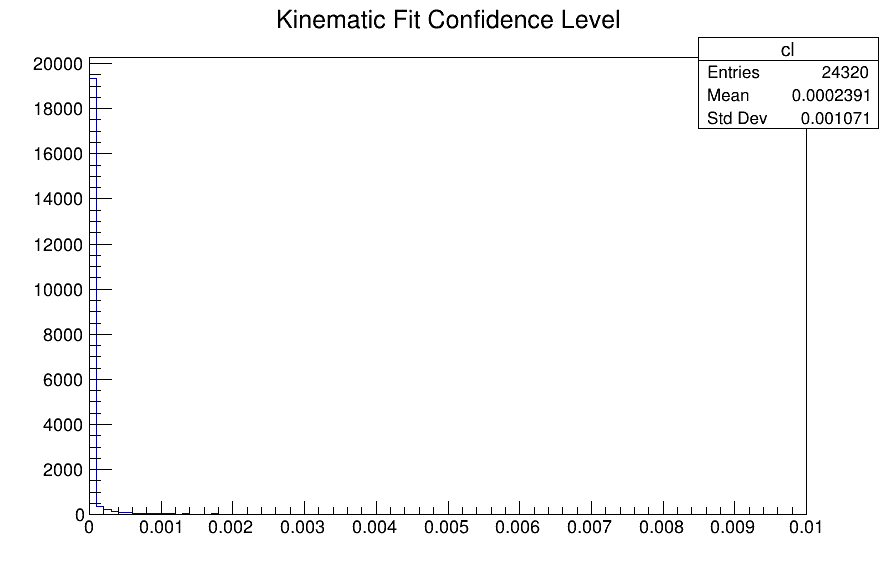

In [5]:
c = ROOT.TCanvas('c', 'c', 900, 600)
hist_cl.Draw()
c.Draw()

In [6]:
print(df.Filter('kinfit_cl < 0.0001').Count().GetValue())

19314


In [7]:

hist_chi2 = df.Histo1D(('chi2', 'Kinematic Fit #chi^{2}', 100, 0, 100), 'kin_chisq')
hist_chi2ndf = df.Histo1D(('chi2ndf', 'Kinematic Fit #chi^{2}/NDF', 100, 0, 100), 'kin_chi2ndf')
hist_chi2ndf.SetLineColor(ROOT.kRed)

In [8]:
hist_chi2.Scale(1/hist_chi2.Integral())
hist_chi2ndf.Scale(1/hist_chi2ndf.Integral())

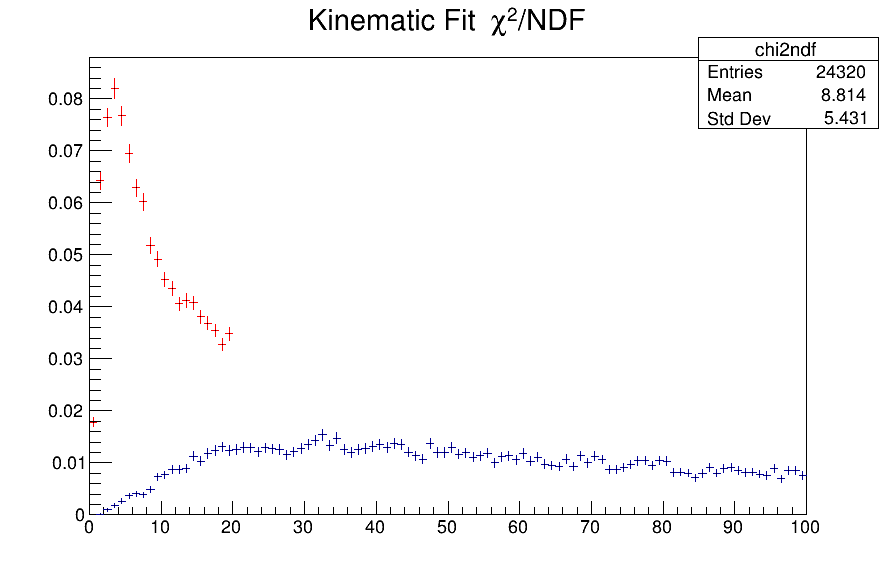

In [9]:
hist_chi2ndf.Draw()
hist_chi2.Draw('same')
c.Draw()

In [10]:
hist_chi2ndf_vs_cl = df.Histo2D(('chi2ndf_vs_cl', 'Kinematic Fit #chi^{2}/NDF vs CL', 100000, 1e-7, 0.01, 75, 0, 10), 'kinfit_cl', 'kin_chi2ndf')

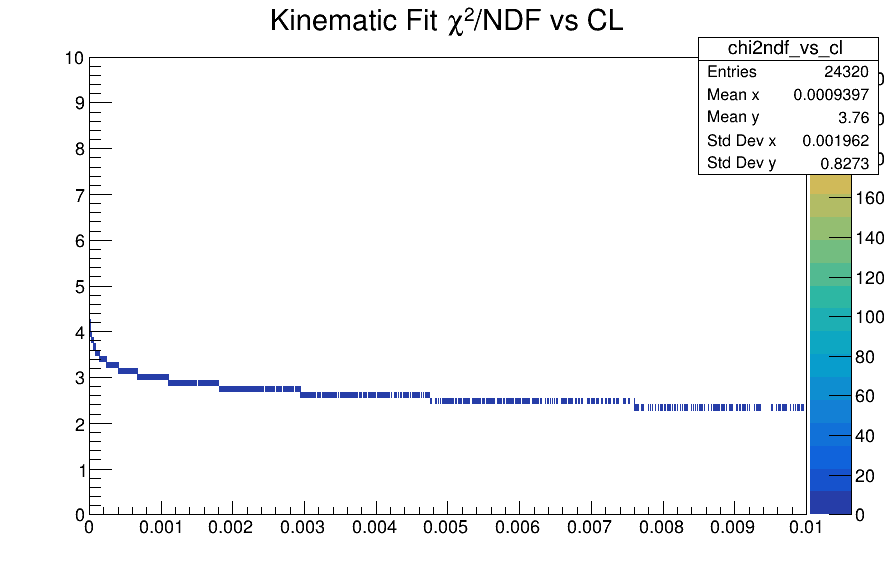

In [11]:
hist_chi2ndf_vs_cl.Draw('colz')
c.Draw()

In [15]:
print(df.Filter('kinfit_cl > 1E-5').Count().GetValue()/df.Count().GetValue())

0.25119243421052634
